## Cluster Analysis 

### Create new dataset with relevant features: 
- no. of problems attempted
- Average time taken for each problem 
- average accuracy 
- Number of times a user upgrades
- Number of time a user downgrades
- Average time between each exercise 
- no. of hints used per qns attempted
- points
- user grade
- teacher count
- student count 
- class count 
- belongs to count 
- badges count 

In [91]:
# Import libraries 
import pandas as pd 
import numpy as np 
import re  
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import datetime as dt

In [92]:
data_dir = r'C:\Users\Timothy Lim\Desktop\junyi\archive'

# %% load data
info_content = pd.read_csv(os.path.join(data_dir, 'Info_Content.csv'))
info_userdata = pd.read_csv(os.path.join(data_dir, 'Info_UserData.csv'))
log_problem = pd.read_csv(os.path.join(data_dir, 'Log_Problem.csv'))

print(info_content.shape)
print(info_userdata.shape)
print(log_problem.shape)

(1330, 10)
(72758, 12)
(16217311, 14)


In [93]:
# sort by datetime
log_problem['timestamp_TW'] = log_problem['timestamp_TW'].apply(lambda x: dt.datetime.strptime(x[:-4], "%Y-%m-%d %H:%M:%S"))
log_problem.sort_values(by='timestamp_TW', ascending=True, inplace=True)
log_problem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
105021,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=,2,1,True,8,1,0,False,NaN,NaN,0
11669798,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=,1,1,True,10,1,0,False,NaN,NaN,0
3768239,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,vsGlLPd9C58B8myBoGMGre2pDHjh62eRjsqX57D98fU=,5,1,True,6,1,0,False,False,True,1
10163558,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,h3CI/U4QJd6mjYE5xRH8QEst8lRG7otYIz+q1V6Och4=,5,1,True,5,1,0,False,False,True,1
8372688,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,OSuDd4rDo2muXXwwJRU2DQVHkk6/JOGgNzfzNi4PMJM=,3,1,True,4,1,0,False,NaN,NaN,0


#### Basic Feature Engineering

In [94]:
# no. of unique problems attempted
n_problems_attempted = log_problem[['uuid', 'upid']].groupby(by='uuid')['upid'].nunique()
n_problems_attempted

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=      5
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     21
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     10
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     41
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    153
                                               ... 
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=     26
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     27
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    230
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     23
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=     94
Name: upid, Length: 72758, dtype: int64

In [95]:
# no. of unique exercises attempted
n_ex_attempted = log_problem[['uuid', 'ucid']].groupby(by='uuid')['ucid'].nunique()
n_ex_attempted

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=     1
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     1
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     1
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     6
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    25
                                                ..
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=     5
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     4
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    28
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     3
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    12
Name: ucid, Length: 72758, dtype: int64

In [96]:
# for each student, what was the avg time they spent per problem? 
avg_time_problem = log_problem.groupby(by='uuid')['total_sec_taken'].mean()
avg_time_problem

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=     60.400000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=     14.758621
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=     89.800000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     37.804878
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=     31.890323
                                                   ...    
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    130.307692
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=     87.333333
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=     46.907173
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=     10.217391
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=     16.436782
Name: total_sec_taken, Length: 72758, dtype: float64

In [97]:
# student accuracy
student_accuracy = log_problem.groupby(by='uuid')['is_correct'].mean()
student_accuracy

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=    1.000000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=    0.103448
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=    0.700000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=    0.560976
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    0.883871
                                                  ...   
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    0.884615
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=    0.666667
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    0.552743
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=    0.956522
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    0.741379
Name: is_correct, Length: 72758, dtype: float64

In [98]:
# no. of upgrades and downgrades
n_upgrades = log_problem.groupby(by='uuid')['is_upgrade'].sum()
n_downgrades = log_problem.groupby(by='uuid')['is_downgrade'].sum()

In [99]:
# no. of hints used per qns attempted
n_hints_per_attempted = log_problem.groupby(by='uuid')['is_hint_used'].mean()
n_hints_per_attempted

uuid
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=    0.000000
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=    0.724138
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=    0.300000
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=    0.439024
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=    0.032258
                                                  ...   
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=    0.115385
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=    0.259259
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    0.295359
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=    0.043478
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    0.172414
Name: is_hint_used, Length: 72758, dtype: float64

In [100]:
log_problem.tail()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
5351619,2019-08-01,liamj78o0Ae2wnaS0hq7LUfSTsp3xB6HEcffaKBUzGc=,lG8uYsrQADh32pvOcrvytT25qo4UpZUGkrybb4ycFEs=,6yQTtifKhIRKCTcjWwYgZEJgiJeKvNzlI9b5pRh5d4s=,6,1,True,18,1,0,False,False,True,1
8225534,2019-08-01,DndeYzUnQn5RMFK82bE5EUK7UeWFnO3VgT7uAuluqTM=,Av3E5D+JWfyHjDr2vSsiW200MsgBmim5sLZc4UBQM/0=,/ehY6iTAB3z7NB52RLi87aynoVLADwEjle/pIW6WHig=,9,1,True,7,1,0,False,NaN,NaN,1
14727695,2019-08-01,t2N6muKWIarXYsUVv/M4rOx/+Qe0Gy9eC0ufuf7vZ0c=,GcuG2ukgxXmym9WSnWnlpKVNUFysZ8QfpAgpJMcheMU=,HEFfwmy7pwKhEadwn+17iN+Ik+TEWh7KE6fbKWuf0RU=,6,1,False,102,2,0,False,NaN,NaN,1
13201613,2019-08-01,hCyJTrhgUprNNWpJYKPcyHIxDHnbW91tv0OEM0wXSuI=,Wk1PobqnhB1FsjjiU84gVNe9j4O6SLWWYfvGb/l6MR4=,o1ITX1QcpkBe8d4UjsZH3yUfBC9caKoPTJV7Ls6IqNE=,5,1,True,5,1,0,False,False,True,1
15112240,2019-08-01,liamj78o0Ae2wnaS0hq7LUfSTsp3xB6HEcffaKBUzGc=,zcH7Yl/gFwkU2Mej9UzQgaJL66wIdiMucPZwVyeqHxc=,Ms5i+EI/9bpS14wA2YcLHjmfReyVKqfjXuXJe2o9ds8=,1,1,True,31,1,0,False,NaN,NaN,0


In [101]:
# shift cols down by 1
log_problem['ucid_shifted'] = log_problem.groupby(by='uuid', sort=False)['ucid'].shift(1)
log_problem['timestamp_shifted'] = log_problem.groupby(by='uuid', sort=False)['timestamp_TW'].shift(1)
log_problem[log_problem['uuid']==log_problem['uuid'][100]][['timestamp_TW', 'timestamp_shifted', 'ucid', 'ucid_shifted']]

,timestamp_TW,timestamp_shifted,ucid,ucid_shifted
9423058,2019-05-30 16:45:00,NaT,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,NaN
100,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
12909679,2019-05-30 16:45:00,2019-05-30 16:45:00,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
3181643,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,Jl92cIZYcCutl8sqyj2VP8UbUigvqBoHBO/R38DK1DU=
16105881,2019-05-30 16:45:00,2019-05-30 16:45:00,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=,A2548sl8hqkIMIGY7mlg/p2NN83cncQx2SgT00lyByk=
...,...,...,...,...
6673029,2019-06-05 13:30:00,2019-06-05 13:15:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,z5YJ7GOEyGfxENlfIjBKbMbTzhp3V5TS6Zp62Y/PKPc=
4907715,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=
12714752,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=
1951229,2019-06-05 13:30:00,2019-06-05 13:30:00,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=,xaWHtJt0hf186kbfofLHHt94c0qSZE3L7nvrmIAexws=


In [102]:
# keep relevant rows
mask = (log_problem['ucid']!=log_problem['ucid_shifted']) & (log_problem['ucid_shifted'].notna())
relevant_logs = log_problem[mask]

# find time diff
relevant_logs['time_diff'] = (relevant_logs['timestamp_TW'] - relevant_logs['timestamp_shifted']).dt.total_seconds()

# get avg time
avg_time = relevant_logs.groupby(by='uuid')['time_diff'].mean()
avg_time

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


uuid
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=     33369.230769
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=     52846.601942
++KRUQaY4gFsmV7egJVOWqbqbTth/oJBB7yX1HvCSL4=     54818.181818
++LzeMQy/8bNUGD2K5Ms/GdiBlQ16ii82xNw3BYtOZE=     35804.651163
++N4tZH9IkIqtzD06TVvEK4rjiCHFSSqhCtuDhxJvII=      1687.500000
                                                    ...      
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=       270.000000
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=       120.000000
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=    206502.352941
zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM=       120.000000
zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=    208050.000000
Name: time_diff, Length: 62915, dtype: float64

In [103]:
# check
user = 'zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM='
relevant_logs[relevant_logs['uuid']==user][['timestamp_TW', 'timestamp_shifted', 'time_diff']]

,timestamp_TW,timestamp_shifted,time_diff
9878275,2018-10-18 15:15:00,2018-10-18 14:45:00,1800.0
13894993,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
2543842,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
15327539,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
11748199,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
5328350,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
3975278,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
5507915,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
2303509,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0
2335811,2018-10-18 15:15:00,2018-10-18 15:15:00,0.0


In [104]:
# check no negative vals
avg_time.min()

0.0

In [105]:
user = 'zzvvUOwcSXXTXd8xoyimNcm2DjeVPLmZAI19WKfhSAM='
mask = log_problem['uuid']==user
log_problem[mask][['ucid', 'ucid_shifted', 'timestamp_TW', 'timestamp_shifted']]

,ucid,ucid_shifted,timestamp_TW,timestamp_shifted
5787556,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,NaN,2018-10-18 14:45:00,NaT
4959781,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 14:45:00,2018-10-18 14:45:00
9878275,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 14:45:00
13894993,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,2018-10-18 15:15:00,2018-10-18 15:15:00
2543842,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 15:15:00
5033907,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
662089,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
15327539,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00
11748199,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-10-18 15:15:00,2018-10-18 15:15:00
5328350,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-10-18 15:15:00,2018-10-18 15:15:00


In [106]:
# merge everything together
avg_time_problem.name = 'avg_time_per_problem'
student_accuracy.name = 'avg_accuracy'
n_downgrades.name = 'n_downgrades'
n_upgrades.name = 'n_upgrades'
n_hints_per_attempted.name = 'n_hints_per_attempted'
avg_time.name = 'avg_time_btwn_ex'
n_problems_attempted.name = 'n_problems_attempted'
n_ex_attempted.name = 'n_ex_attempted'

clustering_input = pd.concat([n_problems_attempted, n_ex_attempted, avg_time_problem, student_accuracy,
                              n_downgrades, n_upgrades, n_hints_per_attempted, avg_time], axis=1)
clustering_input

,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex
uuid,,,,,,,,
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,5,1,60.400000,1.000000,0,1,0.000000,NaN
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,21,1,14.758621,0.103448,0,0,0.724138,NaN
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,10,1,89.800000,0.700000,0,1,0.300000,NaN
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,41,6,37.804878,0.560976,0,2,0.439024,33369.230769
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,153,25,31.890323,0.883871,0,19,0.032258,52846.601942
...,...,...,...,...,...,...,...,...
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,26,5,130.307692,0.884615,0,4,0.115385,270.000000
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,27,4,87.333333,0.666667,0,3,0.259259,120.000000
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,230,28,46.907173,0.552743,0,17,0.295359,206502.352941


In [107]:
cols_wanted = ['points', 'badges_cnt', 'user_grade', 'has_teacher_cnt', 'has_student_cnt', 'has_class_cnt',
               'belongs_to_class_cnt']

clustering_input = clustering_input.merge(info_userdata[cols_wanted + ['uuid']], left_index=True, right_on='uuid')
clustering_input.set_index('uuid', inplace=True)

In [108]:
clustering_input.isna().sum()

n_problems_attempted        0
n_ex_attempted              0
avg_time_per_problem        0
avg_accuracy                0
n_downgrades                0
n_upgrades                  0
n_hints_per_attempted       0
avg_time_btwn_ex         9843
points                      0
badges_cnt                  0
user_grade                  0
has_teacher_cnt             0
has_student_cnt             0
has_class_cnt               0
belongs_to_class_cnt        0
dtype: int64

In [109]:
clustering_input['avg_time_btwn_ex'] = clustering_input['avg_time_btwn_ex'].fillna(0)

### Clustering
* feature scaling / PCA
    * ideally we want each feature to have a similar scale so that no one feature dominates the clustering algorithm
* K-means clustering
* Interpretation of clustering results

In [110]:
# helper functions
from sklearn.cluster import KMeans

def scale_data(data, scaler):
    scaled_data = pd.DataFrame(scaler.fit_transform(data[data.columns]))
    scaled_data.columns = data.columns
    return scaled_data

def viz_data(data):
    '''
    visualise and check distribution of data
    '''
    
    # infer no. of rows and cols
    nrows = (len(data.columns) // 3) + 1
    ncols = 3
    
    # plot data
    fig, axes = plt.subplots(nrows, ncols, figsize=(22, 20))

    for i, col in enumerate(data.columns):
        target_ax = axes[i // 3, i % 3]
        data[col].plot(kind='hist', ax=target_ax,
                       title=f'distribution of {col}')
    plt.show()

def search_elbow(data, n_clusters=10):
    clusters = []

    for i in range(1, n_clusters + 1):
        km = KMeans(n_clusters=i).fit(data)
        clusters.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=list(range(1, n_clusters+1)), y=clusters, ax=ax)
    ax.set_title('Searching for Elbow')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')

    plt.show()

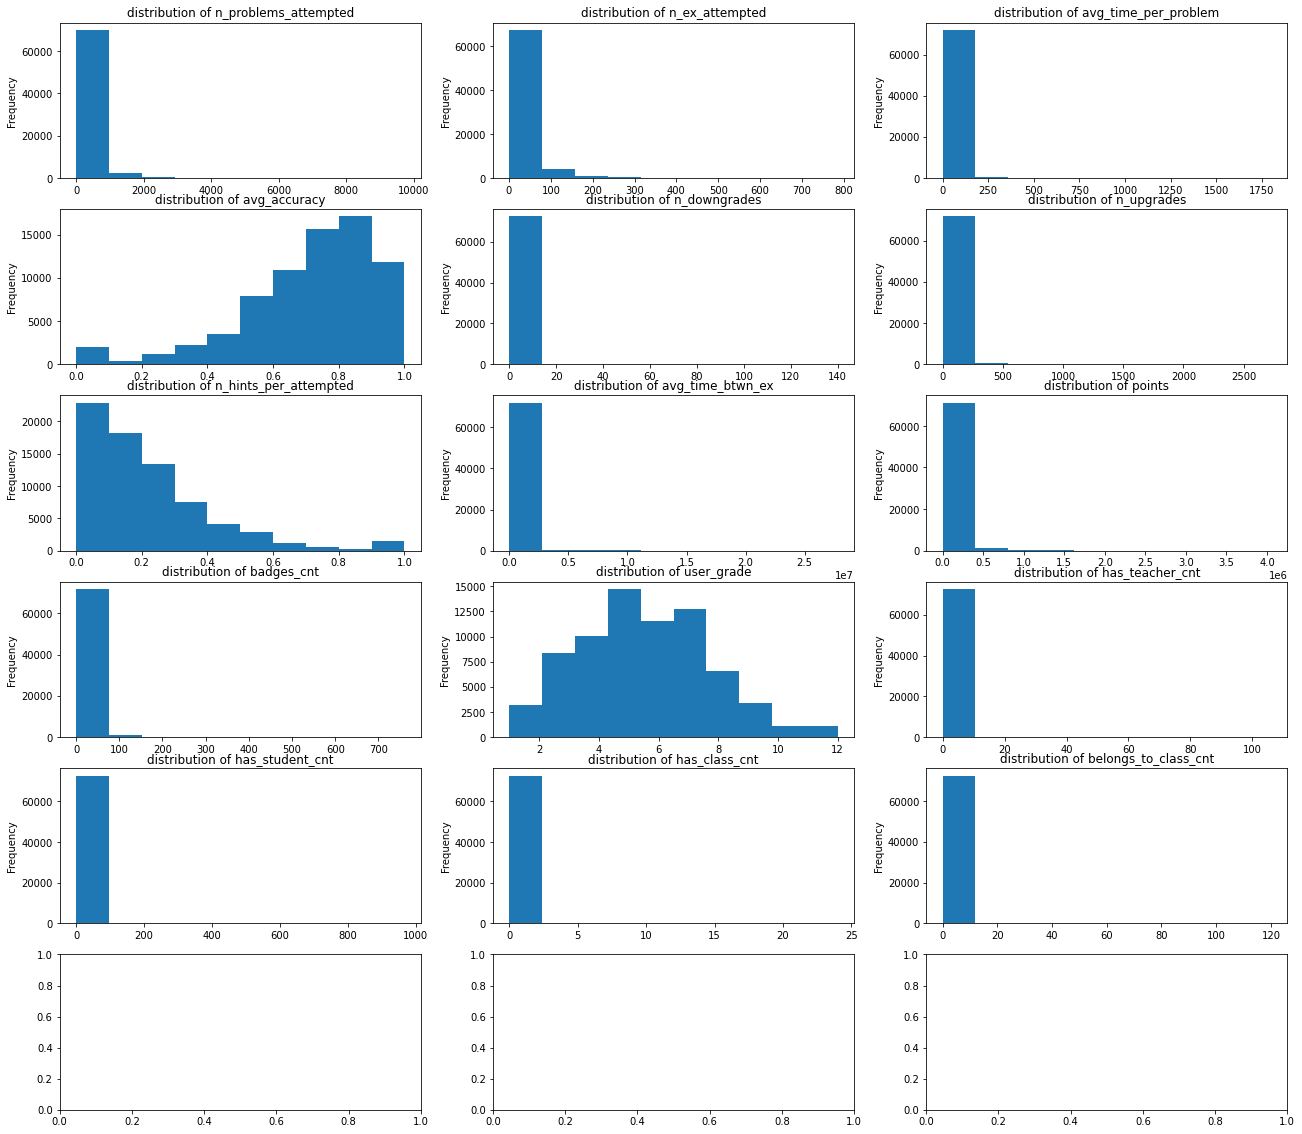

In [111]:
# check distribution of original data
viz_data(clustering_input)

In [112]:
def twoway_plot(x_data, y_data, labels):
    '''
    scatter plot of x and y data
    '''
    n_labels = len(np.unique(labels))
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x_data, y_data, hue=labels, palette=sns.color_palette('hls', n_labels), alpha=0.5)
    plt.title(f'KMeans with {n_labels} clusters')
    plt.show()

def violin_plot(data, labels):
    '''
    call to get distribution of clusters for each feature
    '''
    # infer no. of rows
    nrows = (len(data.columns) // 3) + 1
    
    data['labels'] = pd.Series(labels, index=data.index)

    fig, axes = plt.subplots(nrows, 3, figsize=(24, 22))

    for i, col in enumerate(data.drop(columns='labels').columns):
        # print(col)
        target_ax = axes[i // 3, i % 3]
        sns.violinplot(x='labels', y=col, data=data, ax=target_ax)
        target_ax.set_title(f'Labels according to {col}')

    plt.show()

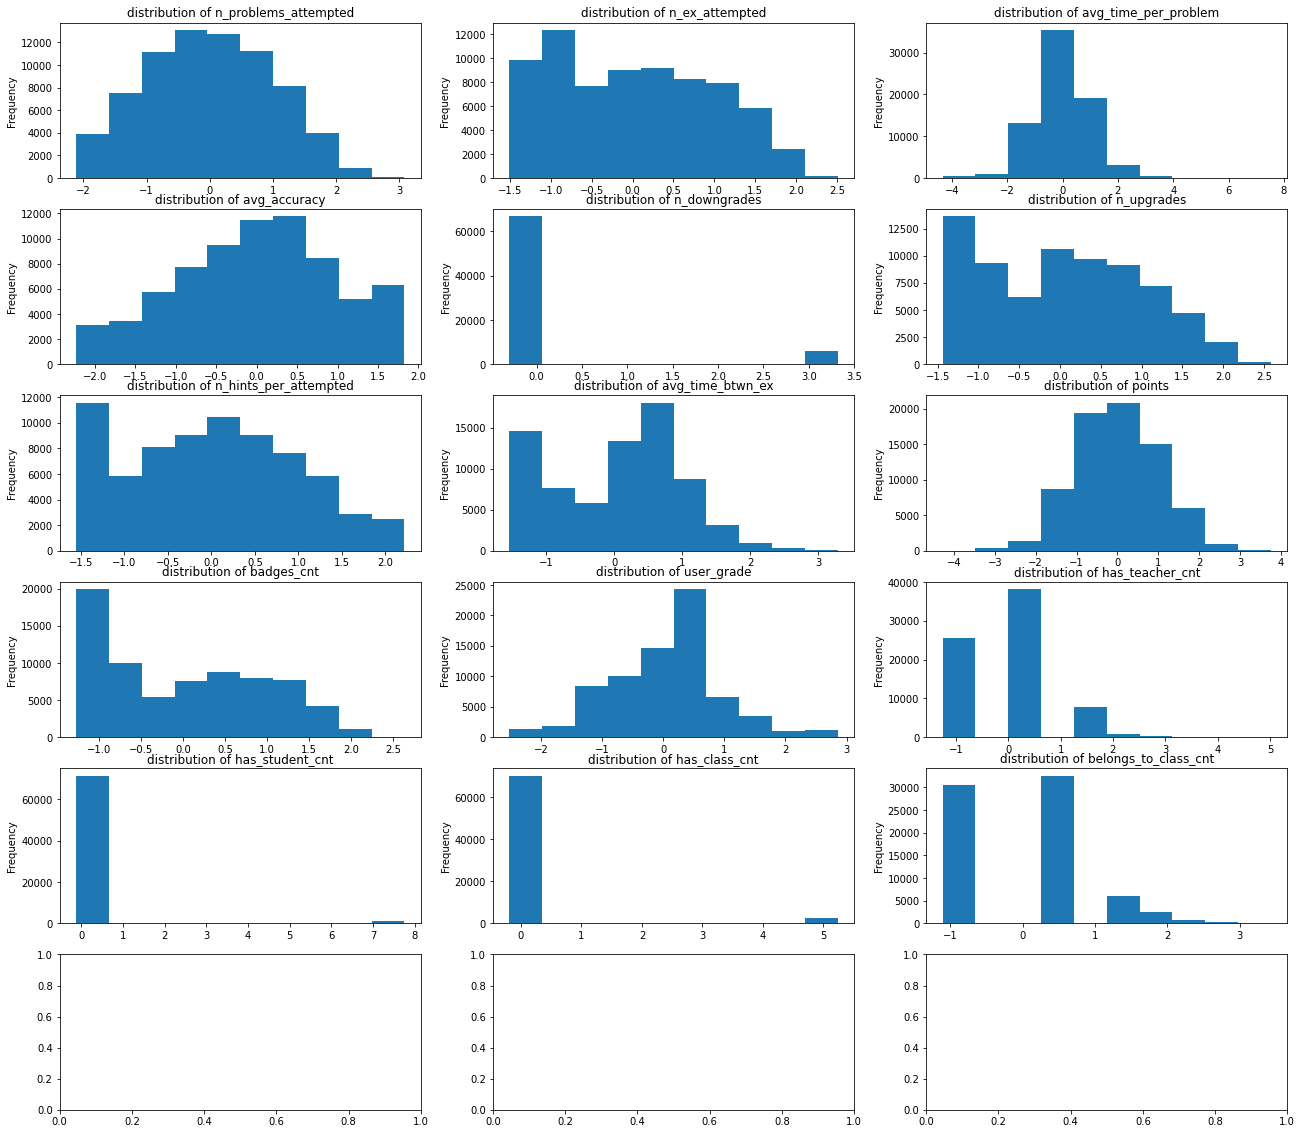

In [113]:
from sklearn.preprocessing import PowerTransformer
# Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. 
pwr = PowerTransformer()
pwr_clustering_input = scale_data(clustering_input, pwr)
viz_data(pwr_clustering_input)


In [114]:
log_problem_tmp = log_problem.set_index('ucid')
log_problem_tmp

,timestamp_TW,uuid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,ucid_shifted,timestamp_shifted
ucid,,,,,,,,,,,,,,,
CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,9Ksy3bdm0HTi0D+cdKSBKDQJjo5GNahep91FqHUrpts=,2,1,True,8,1,0,False,NaN,NaN,0,NaN,NaT
CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,/Wgjdl2BsldHZDdXXvzwGimusaMX548lqV2b7PgwXAs=,1,1,True,10,1,0,False,NaN,NaN,0,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00
CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,vsGlLPd9C58B8myBoGMGre2pDHjh62eRjsqX57D98fU=,5,1,True,6,1,0,False,False,True,1,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00
hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,h3CI/U4QJd6mjYE5xRH8QEst8lRG7otYIz+q1V6Och4=,5,1,True,5,1,0,False,False,True,1,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00
CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,2018-08-01 07:45:00,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,OSuDd4rDo2muXXwwJRU2DQVHkk6/JOGgNzfzNi4PMJM=,3,1,True,4,1,0,False,NaN,NaN,0,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,2018-08-01 07:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lG8uYsrQADh32pvOcrvytT25qo4UpZUGkrybb4ycFEs=,2019-08-01 00:00:00,liamj78o0Ae2wnaS0hq7LUfSTsp3xB6HEcffaKBUzGc=,6yQTtifKhIRKCTcjWwYgZEJgiJeKvNzlI9b5pRh5d4s=,6,1,True,18,1,0,False,False,True,1,LpZS/GFsDGjF3rEt7YLZd8IYdScjZ5Z+5bJuJ/c2BZs=,2019-08-01 00:00:00
Av3E5D+JWfyHjDr2vSsiW200MsgBmim5sLZc4UBQM/0=,2019-08-01 00:00:00,DndeYzUnQn5RMFK82bE5EUK7UeWFnO3VgT7uAuluqTM=,/ehY6iTAB3z7NB52RLi87aynoVLADwEjle/pIW6WHig=,9,1,True,7,1,0,False,NaN,NaN,1,Av3E5D+JWfyHjDr2vSsiW200MsgBmim5sLZc4UBQM/0=,2019-08-01 00:00:00
GcuG2ukgxXmym9WSnWnlpKVNUFysZ8QfpAgpJMcheMU=,2019-08-01 00:00:00,t2N6muKWIarXYsUVv/M4rOx/+Qe0Gy9eC0ufuf7vZ0c=,HEFfwmy7pwKhEadwn+17iN+Ik+TEWh7KE6fbKWuf0RU=,6,1,False,102,2,0,False,NaN,NaN,1,+mwsRV33uKTS+1DrZGfM+z+Ccut/FGocokZm/j0OJ/k=,2019-08-01 00:00:00


In [115]:
info_content_tmp = info_content.set_index('ucid')
info_content_tmp

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
...,...,...,...,...,...,...,...,...,...
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=


In [116]:
log_problem_tmp = log_problem_tmp.merge(info_content_tmp[['level3_id', 'level4_id']], left_index=True, right_index=True)

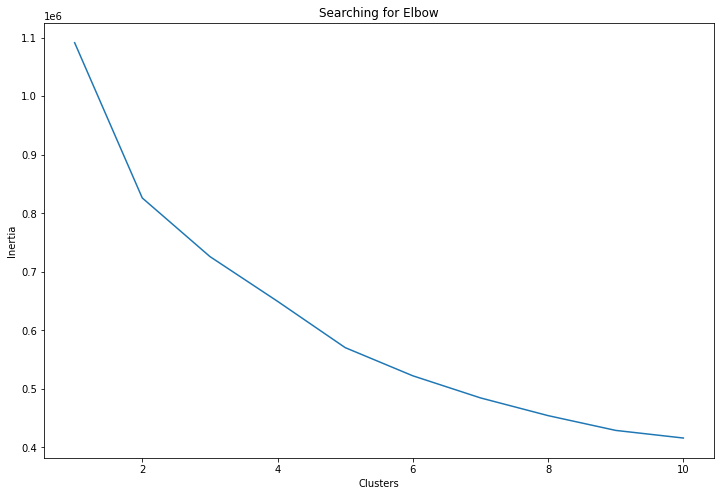

In [117]:
search_elbow(pwr_clustering_input)

In [118]:
log_problem['ucid'].nunique()

1326

In [119]:
# we can try 5 clusters....? but the inertia is not v low

km5 = KMeans(n_clusters=5, random_state=1).fit(pwr_clustering_input)
np.unique(km5.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([15575, 29995,  5740, 20257,  1191], dtype=int64))

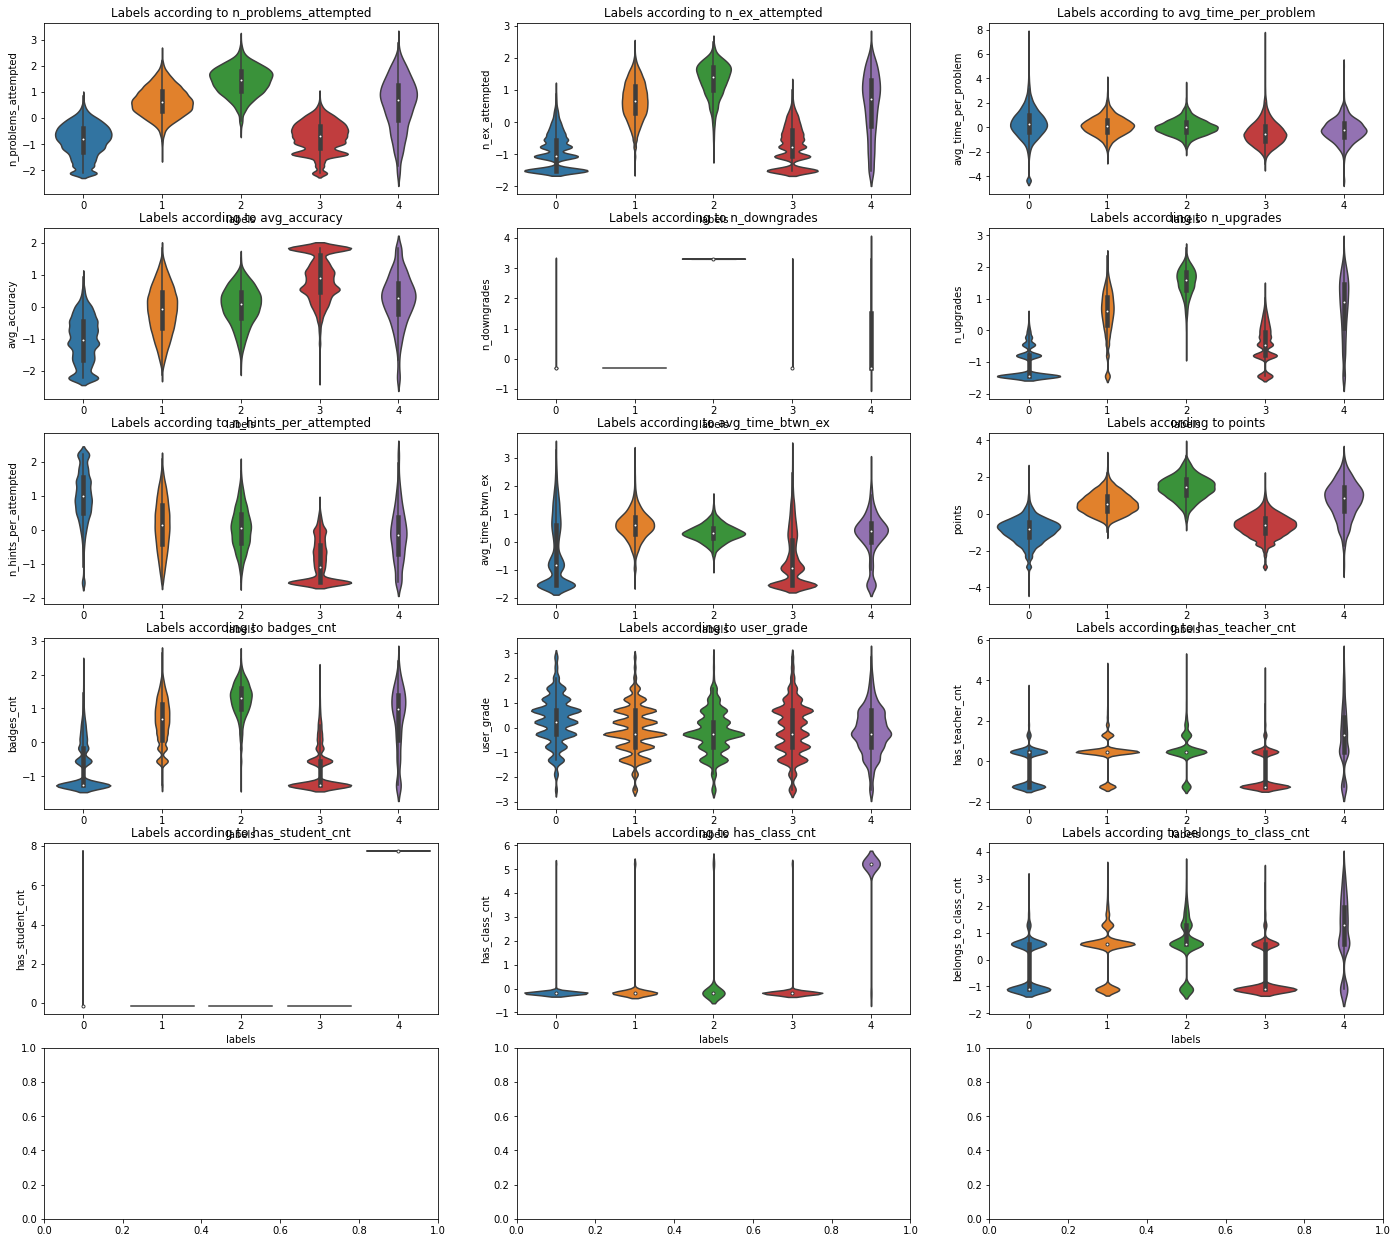

In [120]:
violin_plot(pwr_clustering_input, km5.labels_)

At least the clustering is no longer dominated by a few features anymore

In [121]:
# generate learning paths (what was the seq. of exercises each student encountered?)

ex_seq = log_problem.groupby(by=['uuid'], sort=False)['ucid'].apply(lambda x: tuple(x.unique()))
ex_seq

uuid
U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=    (CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...
ZtYcfQTg++4WtnOkIdgI7O4odEyGxOP4ZchUy1ENNIY=    (KpJfQutqPUoUbwWZ5oNFKeVhvKqXZcqL69vsPEHg9jY=,...
tj/HawoHmjMZJFe3o2B5zeASGbnAuNUtzNd1YrtcHdw=    (TKDAjftSYyI2PNmAkXdInD39P5BcPNa6a+qx0fxm4RA=,...
AHtLCC16j7YXj6gCouJXMcLe7UapiMEO1DBn5xUfM6Q=    (PGbCr6wCmzlyPoKCBQv8aOM0NW8HVk4PW+IU4iR6GRI=,...
j/Prqubd0XhHmteIdpCvOcq7IgV4Ib9qLXF1gwNI5ww=    (h327f3+M2F6lvbXTOgg35VC4pac6YD68c7hjS2DPPiA=,...
                                                                      ...                        
saB6CvIM32G0+RDry4wCo5ro6A1kI3fKYaKsjwQc+T4=    (wZCkmlfJ0G2xyiucQ85Ms+DMGXRSg8yhQ+MiwtSHS30=,...
90OCKSK8bkx4M+KdLllF8XNzykbJldJtxWaxQRuxPWY=    (XPjtEuV2qgexNe8re/JecZlBLnzABLhXY2kd8BFHlRg=,...
imiCDl6LZJWvpM7rdQkP1wMTYMFxWC9qTFJsIuFaGhg=      (WkiJbEtcQ/6K9mzb+6b/b9MvUag94v5b3NTx6TRIcn8=,)
0Zo0lVHE8Y33fjFhq9XiO/C1ha5rwl9sQ5Hd8h5dEjw=    (dVKfHzCsi1dOBhd343bsUNF4dowsiANnvRBkWqToitg=,...
PeAJ/aTTLSnfsL0

In [122]:
# check
user = ex_seq.index[0]
result = ex_seq.loc[user]

all(log_problem[log_problem['uuid']==user]['ucid'].drop_duplicates().values == result)

True

In [123]:
pwr_clustering_input.index = clustering_input.index
pwr_clustering_input['ex_seq'] = ex_seq

# check
assert all(pwr_clustering_input.loc[user, 'ex_seq']==log_problem[log_problem['uuid']==user]['ucid'].drop_duplicates().values)

pwr_clustering_input

,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt,labels,ex_seq
uuid,,,,,,,,,,,,,,,,,
++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,-1.410654,-1.508296,0.697767,1.825396,-0.301452,-0.788386,-1.555771,-1.543180,-0.141822,-0.549657,0.694992,0.470735,-0.129058,-0.191044,0.587290,3,"(VY6aXT7f64ny+uy4pszHVNSy3WHyoFPuhwToxBhB3wM=,)"
++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,-0.590123,-1.508296,-1.282285,-2.101984,-0.301452,-1.438151,1.887772,-1.543180,-1.592468,0.068087,0.694992,0.470735,-0.129058,-0.191044,0.587290,0,"(FR4KFXSJBwuu1LqaZRVJs+gv6d7T8mqibchrQhNvAKc=,)"
++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,-1.026137,-1.508296,1.338368,-0.263588,-0.301452,-0.788386,0.726693,-1.543180,-0.471426,-1.269355,-0.263684,0.470735,-0.129058,-0.191044,0.587290,0,"(Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,)"
++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,-0.186902,-0.242700,-0.011491,-0.916095,-0.301452,-0.447372,1.251383,0.352527,-0.569988,-1.269355,0.224672,0.470735,-0.129058,-0.191044,0.587290,0,"(hxF+GCZ2kFjuoHOUVj0a6Jn9NbRfydExscjLa0cvxuw=,..."
++GobOSWqrsaxoRg1bMN+T6biIJcgBXwuOH/ddq3DiU=,0.613114,0.789674,-0.256470,0.892006,-0.301452,0.832111,-1.183977,0.493793,0.420751,-0.176900,0.694992,0.470735,-0.129058,-0.191044,0.587290,1,"(UJx6vGY4lwuup0V3VTTKZmE76AogRe5ecQHc+Yly1YM=,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zztwLsjf44Uzumou84qh04wObpugkIllLCIp/mgoMu8=,-0.462051,-0.382258,1.974286,0.897453,-0.301452,-0.054681,-0.402798,-0.779459,-0.608626,-1.269355,1.592084,0.470735,-0.129058,-0.191044,0.587290,3,"(E3B9SjT8bMG3v5nbUC0ygPR3x4i/oVjGtA/5V/f05rg=,..."
zzueVRV14tXIEgW4ixiqmtPNaFYz4MIifbMM/H2tmqA=,-0.439343,-0.552831,1.292153,-0.435887,-0.301452,-0.221381,0.529546,-0.919009,-0.993905,-1.269355,-0.773989,-1.254456,-0.129058,-0.191044,-1.108288,0,"(zpLoCKHOugDScAlFt0XHJJKFwU+r3YZaBlTf5G7qWpE=,..."
zzujjvdKzb4wL8cFKdF3Of5gg2XHzIDQCZ2TfaYpSNs=,0.860017,0.864259,0.308740,-0.949541,-0.301452,0.772868,0.705402,0.955155,0.279113,0.247701,-1.312007,1.805723,-0.129058,-0.191044,1.941137,1,"(c7CnB6hlM9deJD6GjunUMpgXQlPcGIKfVuzCTGSGiQ0=,..."


In [124]:
# no. of unique exercise sequences
ex_seq.nunique()

58226

In [125]:
# most popular courses for each cluster
top_n = 5
count_seq = pwr_clustering_input.groupby(by=['labels', 'ex_seq']).size().reset_index(name='count')
most_pop_by_label = count_seq.sort_values(by=['labels', 'count'], ascending=False).groupby(by='labels').head(top_n)

most_pop_by_label

,labels,ex_seq,count
58766,4,"(+cLbiKkV7+VhNPr7OGG3B3kPpZ8er0mvFvqPbM/gm+E=,)",2
58947,4,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,)",2
59080,4,"(Iq4bn747ApUwO7SvDR8vvfjBWGvDxAyBTsce0dN3Q1w=,)",2
59121,4,"(JcrFXI7wzq/14kZRPCdix3feq0/yQh1gHU06bGQwNBE=,)",2
59345,4,"(T2hI5mqqogezvse00UeJHgHc3DDK1vrGyyn7Z6IIpsM=,)",2
47926,3,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,)",320
57449,3,"(tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,)",239
57477,3,"(tOR47i7wGbuHkGxkhX9tHItMHHuJtAttsvHDOjDRVOw=,...",154
58614,3,"(zX5HAUpRYC4F7YPNs5tUeBqVi++rEmPUfsAtHpoZmEQ=,)",122
51163,3,"(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,)",118


In [126]:
info_content.shape

(1330, 10)

In [127]:
log_problem['ucid'].nunique()

1326

<AxesSubplot:title={'center':'no. of students in each cluster'}>

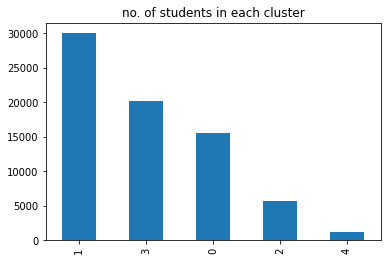

In [128]:
# size of each cluster
pwr_clustering_input['labels'].value_counts().plot(kind='bar', title='no. of students in each cluster')

Results sort of interesting??? A larger proportion of cluster 1 and cluster 4 students take a similar course sequence. There are more students in cluster 2, yet they don't necessarily all take the same sequence of courses.

In earlier analysis, cluster 4 represents students with lower average accuracy while cluster 1 have higher accuracy. 

cluster 2 students have a seemingly mediocre performance in terms of average accuracy.

#### Interpretation of Results
* twoway plot
* decision tree

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


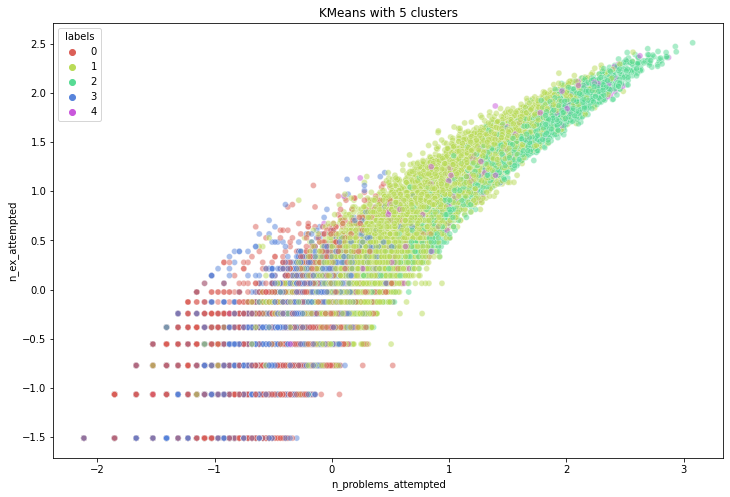

In [129]:
twoway_plot(pwr_clustering_input['n_problems_attempted'], pwr_clustering_input['n_ex_attempted'],
           pwr_clustering_input['labels'])

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


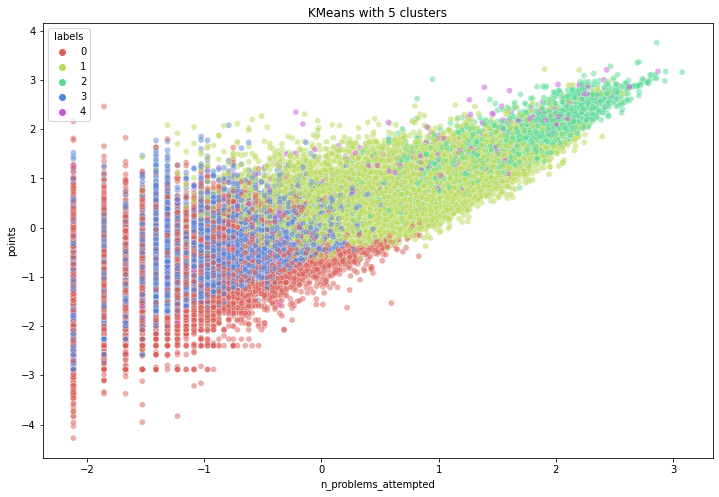

In [130]:
twoway_plot(pwr_clustering_input['n_problems_attempted'], pwr_clustering_input['points'],
           pwr_clustering_input['labels'])

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


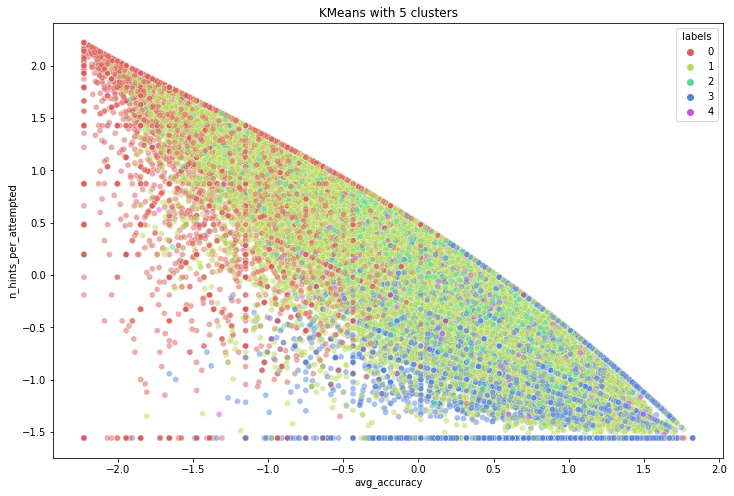

In [131]:
twoway_plot(pwr_clustering_input['avg_accuracy'], pwr_clustering_input['n_hints_per_attempted'],
           pwr_clustering_input['labels'])

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


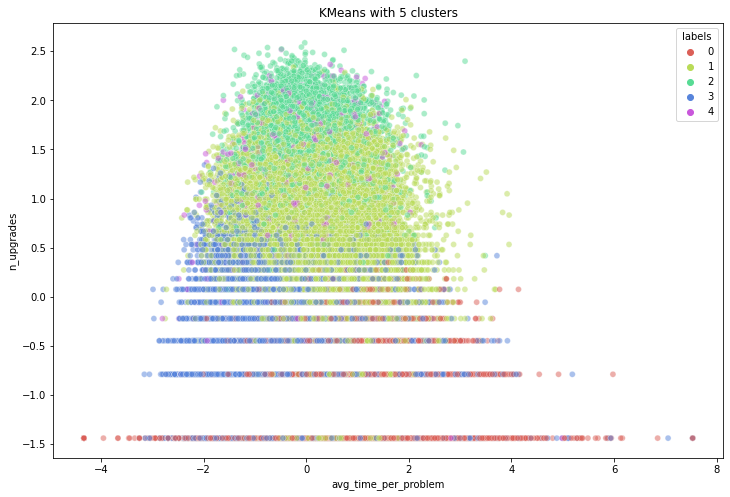

In [132]:
twoway_plot(pwr_clustering_input['avg_time_per_problem'], pwr_clustering_input['n_upgrades'],
           pwr_clustering_input['labels'])

The following hypotheses can be drawn about the student clusters: 

* students from cluster 0 are not that active on the platform (low number of attempted problems and exercises, low number of points). This shows in their low average accuracy. 

* students from cluster 1 have similar performance to students from cluster 0 in terms of accuracy. Yet, they appear less active on the platform

* students from cluster 2 are hardworking (high number of attempted problems, exercises and points), but this does not necessarily translate into good performance (avg_accuracy is spread out, not significantly higher than average) 

* students from cluster 3 have good performance (high avg_accuracy) but below average activity on the platform (low number of attempted problems, exercises and points). These students might have found the exercises too easy and chose not to continue learning on the platform 

* relatively too few students from cluster 4 to compare properly against other clusters

#### Interpreting clusters with decision trees

idea: use the resulting labels as the target variable. Run a decision tree to predict the labels and use the rules extracted to 'define' each cluster. 

In [133]:
original = pd.DataFrame(pwr.inverse_transform(pwr_clustering_input.drop(columns=['labels', 'ex_seq'])))
original.columns = pwr_clustering_input.drop(columns=['labels', 'ex_seq']).columns
original

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\sklearn\preprocessing\_data.py:3179: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt
0,5.0,1.0,60.400000,1.000000,0.0,1.0,0.000000,-1.776357e-15,16725.0,1.0,7.0,1.0,0.0,0.0,1.0
1,21.0,1.0,14.758621,0.103448,0.0,0.0,0.724138,-1.776357e-15,1200.0,3.0,7.0,1.0,0.0,0.0,1.0
2,10.0,1.0,89.800000,0.700000,0.0,1.0,0.300000,-1.776357e-15,9533.0,0.0,5.0,1.0,0.0,0.0,1.0
3,41.0,6.0,37.804878,0.560976,0.0,2.0,0.439024,3.336923e+04,8027.0,0.0,6.0,1.0,0.0,0.0,1.0
4,153.0,25.0,31.890323,0.883871,0.0,19.0,0.032258,5.284660e+04,41831.0,2.0,7.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,26.0,5.0,130.307692,0.884615,0.0,4.0,0.115385,2.700000e+02,7500.0,0.0,9.0,1.0,0.0,0.0,1.0
72754,27.0,4.0,87.333333,0.666667,0.0,3.0,0.259259,1.200000e+02,3750.0,0.0,4.0,0.0,0.0,0.0,0.0
72755,230.0,28.0,46.907173,0.552743,0.0,17.0,0.295359,2.065024e+05,33370.0,4.0,3.0,3.0,0.0,0.0,4.0
72756,23.0,3.0,10.217391,0.956522,0.0,3.0,0.043478,1.200000e+02,7995.0,1.0,5.0,1.0,0.0,0.0,0.0


In [134]:
original.describe()

,n_problems_attempted,n_ex_attempted,avg_time_per_problem,avg_accuracy,n_downgrades,n_upgrades,n_hints_per_attempted,avg_time_btwn_ex,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,has_class_cnt,belongs_to_class_cnt
count,72758.000000,72758.000000,72758.000000,72758.000000,72758.0,72758.000000,72758.000000,7.275800e+04,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.0,72758.0,72758.000000
mean,189.464994,23.778691,46.376928,0.711953,inf,24.162649,0.216744,1.906884e+05,6.304759e+04,9.543789,5.620715,0.884810,inf,inf,0.873306
std,374.213832,41.192548,41.495410,0.211702,NaN,71.383621,0.202040,8.465471e+05,1.242042e+05,19.036328,2.041178,1.552795,NaN,NaN,1.961188
min,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.776357e-15,1.000000e+00,0.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,16.000000,3.000000,24.675103,0.612430,0.0,1.000000,0.074074,1.350000e+02,6.285000e+03,0.000000,4.000000,0.000000,0.0,0.0,0.000000
50%,55.000000,8.000000,37.823529,0.751604,0.0,4.000000,0.167791,2.373944e+04,2.040000e+04,3.000000,6.000000,1.000000,0.0,0.0,1.000000
75%,191.000000,26.000000,56.219913,0.855729,0.0,17.000000,0.300000,1.055089e+05,6.531375e+04,10.000000,7.000000,1.000000,0.0,0.0,1.000000
max,9721.000000,785.000000,1800.000000,1.000000,inf,2726.000000,1.000000,2.779110e+07,4.047528e+06,760.000000,12.000000,106.000000,inf,inf,120.000000


In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier(max_depth=4, random_state=12345)  # maybe can add more hyperparameters later
# X = pwr_clustering_input.drop(columns=['labels', 'ex_seq'])

X = original[['n_problems_attempted', 'n_downgrades', 'avg_accuracy', 'has_student_cnt']]

# inverse transform results in some inf values..need to replace
X['n_downgrades'] = X['n_downgrades'].replace([np.inf], clustering_input['n_downgrades'].max())
X['has_student_cnt'] = X['has_student_cnt'].replace([np.inf], clustering_input['has_student_cnt'].max())

y = pwr_clustering_input['labels']

# init the cv
cv_results = cross_validate(dt, X, y, cv=5,
                           scoring=('accuracy', 'balanced_accuracy'),
                           return_train_score=True,
                           return_estimator=True)

print(cv_results.keys())

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'train_accuracy', 'test_balanced_accuracy', 'train_balanced_accuracy'])


In [136]:
cv_results['test_balanced_accuracy']

array([0.87704397, 0.88466468, 0.87455026, 0.87077393, 0.87639105])

Results arent that bad..!

In [137]:
# analyse the decision tree estimator

fitted_dt = cv_results['estimator'][0]

# feature importance
for name, importance in sorted(zip(X.columns, fitted_dt.feature_importances_), key=lambda x: x[1]):
    print(f'{name}: {importance}')

has_student_cnt: 0.04994992463556653
n_downgrades: 0.23012641917380838
avg_accuracy: 0.2957845129145699
n_problems_attempted: 0.42413914327605523


In [138]:
y.unique()

array([3, 0, 1, 2, 4])

In [139]:
import graphviz
import pydot
from sklearn.tree import export_graphviz
from io import StringIO


dot_data = StringIO()
export_graphviz(fitted_dt, feature_names=X.columns,
                class_names=[f'label {c}' for c in range(5)],
                filled=True, rounded=True,
                special_characters=False,
                out_file=dot_data)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf('graph.pdf')


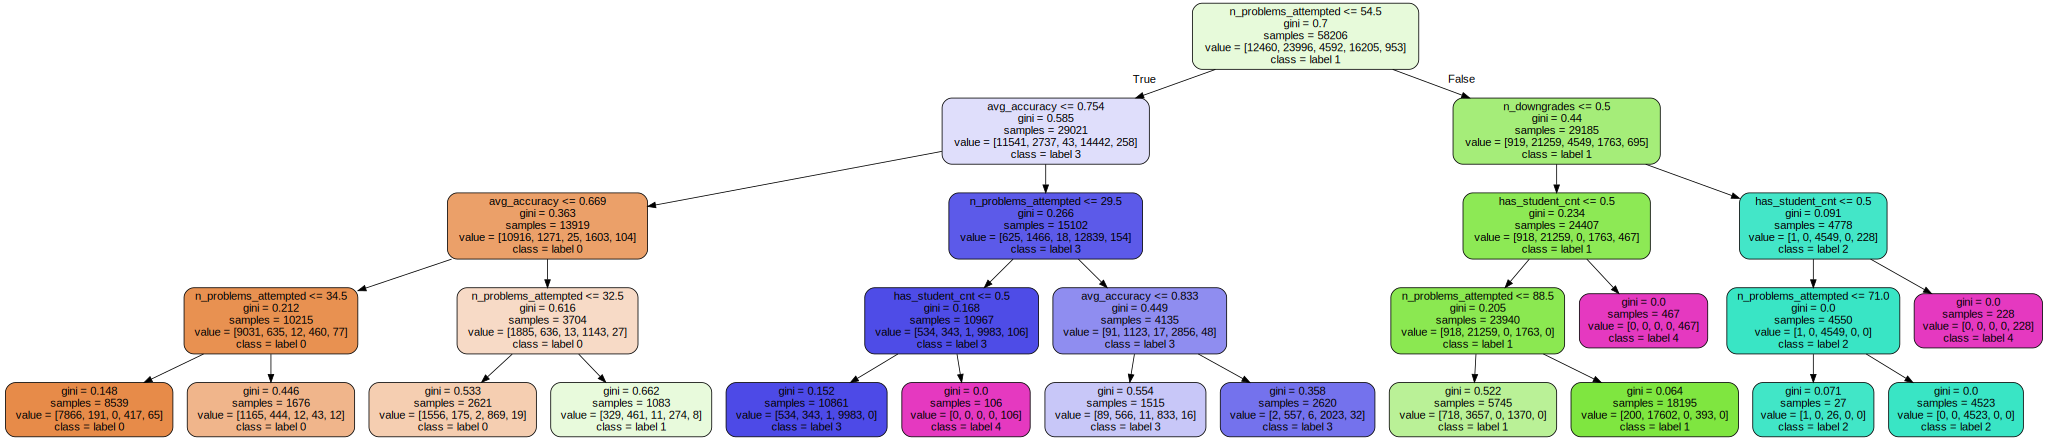

In [140]:
graphviz.Source(graph[0])

Now, we can manually eyeball the decision tree to observe any patterns...

For example, the following insights can be extracted for each label:  
On average, label 0 and 3 attempted less than 54.5 problems. label 1 and 2 attempted more than 54.5 problems. 
* label 0:
    * avg_accuracy <= 0.67
    * 0.67 <= avg_accuracy <= 0.75 and n_problems_attempted <=32.5 
    
* label 1: 
    * n_downgrades > 0.5 and has_student_cnt <= 0.5 (downgraded at least once, has no students) 

* label 2: 
    * n_downgrades <= 0.5 and has_student_cnt <= 0.5 (never been downgraded, no students) 
    
* label 3:
    * avg_accuracy > 0.75 and n_problems_attempted >= 29
    * n_problems_attempted <= 28.5 and has_student_cnt <= 0.5
  
* label 4: 
    * minority class...harder to generalize 

If too hard, we can always prune the tree to extract a more generalizable rule. 

how to extract rules: https://towardsdatascience.com/the-easiest-way-to-interpret-clustering-result-8137e488a127

#### learning path at level 4 id level 

In [141]:
# most popular level 4 id
log_problem_tmp['level4_id'].value_counts().idxmax()

'0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0='

In [142]:
# check ex_seq for some random level4_id
# lvl4_target = 'F3HInaB4hWcLa624T5q79KZbldijC9eqYhxg/msV8oA='  # random chapter

lvl4_target = log_problem_tmp['level4_id'].value_counts().idxmax()
mask = log_problem_tmp['level4_id']==lvl4_target
lvl4_target_data = log_problem_tmp[mask]
lvl4_target_data.reset_index(inplace=True)

# get ucid seq for given level4_id
# unique() returns in order of appearance
lvl4_ex_seq = lvl4_target_data.groupby(by=['uuid'], sort=False)['ucid'].apply(lambda x: tuple(x.unique()))  
print(lvl4_ex_seq.shape)

# add labels
lvl4_ex_seq = lvl4_ex_seq.to_frame().merge(pwr_clustering_input[['labels']], left_index=True, right_index=True)
lvl4_ex_seq.rename(columns={'ucid': 'ex_seq'}, inplace=True)
lvl4_ex_seq.head()

(18746,)


,ex_seq,labels
uuid,,
U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1
6kcIjAFqx2/JSX7a3bqZ5R79h2Jc/J8xYjZWGN2tqlc=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1
2KadvKfG/TfzpwuTOFbZqib17OPb8xL34EaQ0jYO0dE=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",2
AS8c1HBSQ452TcKSWbqhsiI9pWvzOkcAmoGRl8lIDLU=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1
0YCwmhBg1HrIxDAkvfk3d53Ct9gG/D/oPUepi+9wci8=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3


In [143]:
# get count for each seqeunces appearance
count_lvl4_ex_seq = lvl4_ex_seq.groupby(by=['ex_seq', 'labels']).size().reset_index(name='count')
most_pop_by_label = count_lvl4_ex_seq.sort_values(by=['labels', 'count'], ascending=False).groupby(by='labels').head(5)

most_pop_by_label

,ex_seq,labels,count
23,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",4,412
4,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,)",4,48
70,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",4,32
75,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",4,23
80,"(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,)",4,15
22,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3,1030
3,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,)",3,851
74,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3,450
69,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3,425
79,"(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,)",3,253


We can try and see if adding a minimum length filter for the learning path makes a difference. Label 0 looks quite sparse.

In [144]:
# get length of learning path
min_len = 3
lvl4_ex_seq['ex_seq_len'] = lvl4_ex_seq['ex_seq'].apply(lambda x: len(x))

len_mask = lvl4_ex_seq['ex_seq_len'] >= min_len
long_data = lvl4_ex_seq[len_mask]

# get counts for ex seq again
# get count for each seqeunces appearance
count_lvl4_ex_seq = long_data.groupby(by=['ex_seq', 'labels']).size().reset_index(name='count')
most_pop_by_label = count_lvl4_ex_seq.sort_values(by=['labels', 'count'], ascending=False).groupby(by='labels').head(5)

# count_lvl4_ex_seq = long_data.groupby(by=['ex_seq']).size().reset_index(name='count')
# most_pop_by_label = count_lvl4_ex_seq.sort_values(by=['count'], ascending=False).head(5)

most_pop_by_label

,ex_seq,labels,count
13,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",4,412
50,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",4,32
40,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",4,12
55,"(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,...",4,9
18,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",4,6
12,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3,1030
49,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3,425
39,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3,221
54,"(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,...",3,72
17,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",3,62


looks like most of them start with the same exercise.

In [145]:
# printing pretty learning path names
from google_trans_new import google_translator

# create lookup for translation, credit to HM for the brilliant idea
translation_dict = {}
translator = google_translator()
level4_seq = info_content[info_content['level4_id']==lvl4_target]['ucid']
for content in level4_seq:
    pretty_name = info_content[info_content['ucid']==content]['content_pretty_name'].values[0]
    eng_pretty_name = translator.translate(pretty_name, lang_src='zh', lang_tgt='en')
    translation_dict[content] = eng_pretty_name


def print_seq_names(seq):
    for ex in seq:
        print(translation_dict[ex])

# names of exercises in this level 4 ID
print_seq_names(level4_seq)

[Basic] One-on-one correspondence 
[Basic] Sequence 
[Basic] 6 and 6 
[Basic] Comparison of the size within 10 
[Basic] Number of 11 to 20 


In [146]:
for content in level4_seq:
    pretty_name = info_content[info_content['ucid']==content]['content_pretty_name'].values[0]
    print(pretty_name)

【基礎】一對一對應數數
【基礎】第幾個
【基礎】6 個和第 6 個
【基礎】10 以內的大小比較
【基礎】11 到 20 的數


In [147]:
info_content[info_content['level4_id']==lvl4_target]

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
1029,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,【基礎】一對一對應數數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=
1030,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,【基礎】第幾個,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=
1031,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,【基礎】6 個和第 6 個,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=
1032,T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,【基礎】10 以內的大小比較,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=
1033,PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,【基礎】11 到 20 的數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,0kg46I/6iMMbn3w0M3CGBQ0jcjNGl+29E3S2vihaIo0=


Looks like this is some basic chapter, since difficulty is 'easy' and learning stage is 'elementary'.  The names of the exercises also do not look too intimidating.   

If you can read chinese, please feel free to verify the translations...

In [148]:
# most popular path for label 4
print_seq_names(most_pop_by_label.iloc[13]['ex_seq'])

[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] 6 and 6 
[Basic] Sequence 


In [149]:
# most popular path for label 3
print_seq_names(most_pop_by_label.iloc[12]['ex_seq'])

[Basic] One-on-one correspondence 
[Basic] Comparison of the size within 10 
[Basic] 6 and 6 
[Basic] Sequence 


In [150]:
# label 2
print_seq_names(most_pop_by_label.loc[11]['ex_seq'])

[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] 6 and 6 
[Basic] Sequence 


In [151]:
# label 1
print_seq_names(most_pop_by_label.loc[10]['ex_seq'])

[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] 6 and 6 
[Basic] Sequence 


In [152]:
# label 0
print_seq_names(most_pop_by_label.loc[46]['ex_seq'])

[Basic] One-on-one correspondence 
[Basic] 6 and 6 
[Basic] Sequence 


In [153]:
# top 2 learning paths in label 1
seq1 = most_pop_by_label.loc[10]['ex_seq']
seq2 = most_pop_by_label.loc[47]['ex_seq']

print_seq_names(seq1)
print('\n')
print_seq_names(seq2)

[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] 6 and 6 
[Basic] Sequence 


[Basic] One-on-one correspondence 
[Basic] 6 and 6 
[Basic] Sequence 


Given the sequences above, should they be considered as the same learning path? Or should it be different?   
The 1st sequence: **exercise A -> .... -> exercise B -> exercise C**  
The 2nd sequence: **exercise A -> exercise B -> exercise C**

So the 2nd sequence is basically a more truncated version of the 1st. But we are not really sure about the efficacy of either learning path. 


Based on this brief exploration, we see that filtering by level 4 id does not necessarily help to reduce the diverseness of the possible learning paths taken by students. Thus, it might be appropriate to create a pipeline that does the following: 
* takes in a given level 4 id, filters the data accordingly
* creates a sequence of embeddings to cluster the learning paths (might need to decide new method to aggregate the vectors) 
* output popular learning paths (clusters) for each sequence 

A more abitious approach might be to incorprate some information about *difficulty* and *learning_stage* data to measure the efficacy of given learning paths. For example, if students make progress in terms of *learning_stage*, we might be able to say that these paths were effective. 

#### SGT embedding 
https://github.com/cran2367/sgt/tree/master/python 

In [154]:
from sgt import SGT

# simple example
sgt = SGT()
sgt.fit(np.array(['A', 'B', 'C']))

(A, A)    0.000000
(A, B)    0.367879
(A, C)    0.135335
(B, A)    0.000000
(B, B)    0.000000
(B, C)    0.367879
(C, A)    0.000000
(C, B)    0.000000
(C, C)    0.000000
dtype: float64

Based on this example, we can get an intuition about how the SGT algorithm generates embeddings. 

We have a very simple sequence, **A->B->C**. Each possible *transition* is assigned a value, based on its occurrence within the sequence.  

In the example sequence, **A->B** and **B->C**, thus these are assigned the highest values. **A->C** is punctuated by **B** (noise), so it is assigned a slightly lower weight. **C->A**, **C->B** never happens as **C** is the last element in the sequence. Thus, these are assigned the lowest possible value, 0. 

TL;DR: embeddings are generated based on the relative positions of the elements within the sequence. The higher the value, the stronger the relationship. 

In [155]:
sgt = SGT(flatten=True, alphabets=list(level4_seq.values))
sgt.fit(seq1).to_frame()

,0
"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=)",0.000000
"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=)",0.018316
"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=)",0.049787
"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=)",0.135335
"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=)",0.367879
"(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=)",0.000000
"(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=)",0.000000
"(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=)",0.000000
"(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=)",0.000000
"(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=)",0.000000


In [156]:
# Learning the sgt embeddings as vector for
# all sequences in a corpus.
# mode: 'default'

# create corpus, filter out those without min len
corpus = long_data['ex_seq'].to_frame()
corpus.reset_index(inplace=True)
corpus['ex_seq'] = corpus['ex_seq'].apply(lambda x: list(x))
corpus.columns = ['id', 'sequence']  # required for this lib

sgt = SGT(kappa=5,
          alphabets=list(level4_seq.values),
          flatten=True, 
          lengthsensitive=True, 
          mode='default')

results = sgt.fit_transform(corpus)
results.head()

,id,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=)","(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=)","(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=)","(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=)","(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=, PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=)","(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=)","(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=)","(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=)","(hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=, T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=)",...,"(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=, CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=)","(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=, hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=)","(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=, TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=)","(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=, T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=)","(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=, PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=)","(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=, CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=)","(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=, hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=)","(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=, TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=)","(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=, T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=)","(PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=, PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=)"
0,U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,0.0,0.168591,0.458279,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,6kcIjAFqx2/JSX7a3bqZ5R79h2Jc/J8xYjZWGN2tqlc=,0.0,0.025271,0.068693,0.186726,0.507574,0.0,0.0,0.0,0.0,...,0.0,0.186726,0.507574,0.0,0.0,0.0,0.068693,0.186726,0.507574,0.0
2,2KadvKfG/TfzpwuTOFbZqib17OPb8xL34EaQ0jYO0dE=,0.0,0.025271,0.068693,0.186726,0.507574,0.0,0.0,0.0,0.0,...,0.0,0.186726,0.507574,0.0,0.0,0.0,0.068693,0.186726,0.507574,0.0
3,AS8c1HBSQ452TcKSWbqhsiI9pWvzOkcAmoGRl8lIDLU=,0.0,0.025271,0.068693,0.186726,0.507574,0.0,0.0,0.0,0.0,...,0.0,0.186726,0.507574,0.0,0.0,0.0,0.068693,0.186726,0.507574,0.0
4,92JfNeJG3r+nfQa7jqjfh7H76vmjsLqRkw9PpSEsT8A=,0.0,0.025271,0.068693,0.186726,0.507574,0.0,0.0,0.0,0.0,...,0.0,0.186726,0.507574,0.0,0.0,0.0,0.068693,0.186726,0.507574,0.0


In [157]:
corpus.shape

(12879, 2)

In [158]:
results.shape

(12879, 26)

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:31: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (17). Possibly due to duplicate points in X.
C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:31: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (18). Possibly due to duplicate points in X.
C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:31: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (19). Possibly due to duplicate points in X.
C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:31: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (20). Possibly due to duplicate points in X.
C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:31: ConvergenceWarning: Number of distinct clus

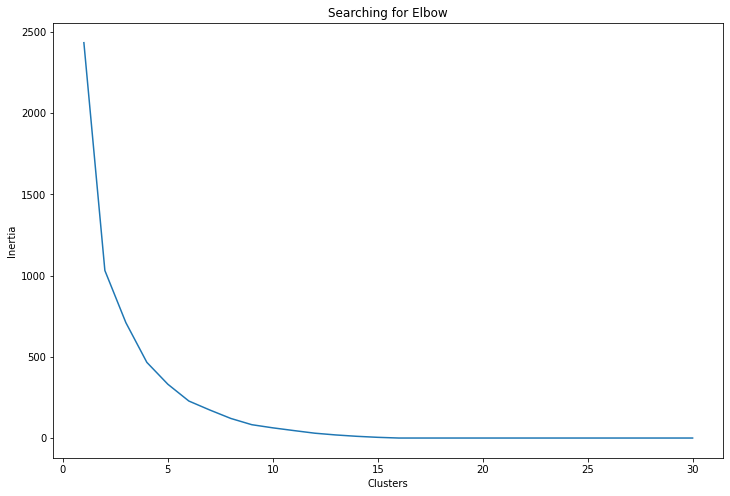

In [159]:
search_elbow(results.set_index('id'), n_clusters=30)

In [160]:
# fit k-means
km_seq = KMeans(n_clusters=6, random_state=12345).fit(results.set_index('id'))
np.unique(km_seq.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 651, 9497, 1393,  582,  316,  440], dtype=int64))

In [161]:
# merge labels and ids
seq_labels = pd.Series(km_seq.labels_, index=results['id'])
long_data['ex_seq_labels'] = seq_labels

# get counts
count_lvl4_ex_seq = long_data.groupby(by=['ex_seq_labels', 'labels']).size().reset_index(name='count')
most_pop_by_label = count_lvl4_ex_seq.sort_values(by=['labels', 'count'], ascending=False).groupby(by='labels').head(5)

most_pop_by_label

C:\Users\Timothy Lim\Anaconda3\envs\capstone\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ex_seq_labels,labels,count
9,1,4,418
14,2,4,32
19,3,4,12
29,5,4,12
4,0,4,11
8,1,3,1053
13,2,3,425
18,3,3,229
3,0,3,154
28,5,3,131


In [162]:
long_data['labels'].value_counts()

1    7366
2    2883
3    2044
4     493
0      93
Name: labels, dtype: int64

Results are identical to when we did it without the embeddings. We see that this is because there are few students from clusters 0, 3 and 4. 

Let's see if we can yield any interpretations from the students with clusters 1 and 2. 

In [163]:
mask = most_pop_by_label['labels'].isin([1, 2])
most_pop_by_label[mask]

,ex_seq_labels,labels,count
7,1,2,2476
12,2,2,142
2,0,2,104
17,3,2,58
22,4,2,58
6,1,1,5537
11,2,1,745
1,0,1,374
16,3,1,276
26,5,1,245


what's in *ex_seq_labels*=1?

In [165]:
# ex_seq_labels = 1

mask = long_data['ex_seq_labels']==1
sequences = long_data[mask]['ex_seq'].unique()
print(len(sequences))

for seq in sequences:
    print_seq_names(seq)
    print('\n')

2
[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] 6 and 6 
[Basic] Sequence 


[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] 6 and 6 
[Basic] Sequence 




This embedding technique takes information about the order in which the exercises are done. 

Apart from the first path starting with an extra course, *One-to-one correspondence number*, these learning paths are actually identical to each other. 

In [166]:
# ex_seq_labels = 2

mask = long_data['ex_seq_labels']==2
sequences = long_data[mask]['ex_seq'].unique()
print(len(sequences))

for seq in sequences:
    print_seq_names(seq)
    print('\n')

1
[Basic] One-on-one correspondence 
[Basic] 6 and 6 
[Basic] Sequence 




In [225]:
# ex_seq_labels = 0

mask = long_data['ex_seq_labels']==0
sequences = long_data[mask]['ex_seq'].unique()
print(len(sequences))

for seq in sequences:
    print_seq_names(seq)
    print('\n')

5
[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] Sequence 


[Basic] One-on-one correspondence 
[Basic] Comparison of the size within 10 
[Basic] Sequence 


[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Sequence 


[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 


[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] Sequence 




If we look at ex_seq_label=1, we immediately notice that the length of these paths are shorter compared to ex_seq_label=0.  

Between these two labels, ex_seq_label=1 looks like a more truncated version, where students immediately jump to *6th and 6th* and *The first few*. 

In ex_seq_label=0, students take other courses before tackling the final 2 exercises. This could be an example of a shorter, more efficient learning path.

#### Sort learning paths by accuracy instead...

ideas from prof sharon tan

In [167]:
# peek at data
long_data

,ex_seq,labels,ex_seq_len,ex_seq_labels
uuid,,,,
U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1,3,2
6kcIjAFqx2/JSX7a3bqZ5R79h2Jc/J8xYjZWGN2tqlc=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1,5,1
2KadvKfG/TfzpwuTOFbZqib17OPb8xL34EaQ0jYO0dE=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",2,5,1
AS8c1HBSQ452TcKSWbqhsiI9pWvzOkcAmoGRl8lIDLU=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1,5,1
92JfNeJG3r+nfQa7jqjfh7H76vmjsLqRkw9PpSEsT8A=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",2,5,1
...,...,...,...,...
Ls6+S20iAbGZvW89Pl3p6kV820sriaR6ohfMou60ryc=,"(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,...",3,3,3
8kpGL7TMMvENQTDEt6K8jSAn8/VnZilleJNBG1MBsUM=,"(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,...",1,3,3
7dx6/ZEcLWtw3eueUUsqm5fDtuEuIA9Tli8eH5nK5wA=,"(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,...",0,3,3


In [172]:
# get accuracy
uuid_acc = lvl4_target_data.groupby(by='uuid')['is_correct'].mean()

# merge with long_data
long_data = long_data.merge(uuid_acc, left_index=True, right_index=True, how='inner')
long_data

,ex_seq,labels,ex_seq_len,ex_seq_labels,is_correct
uuid,,,,,
U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1,3,2,1.000000
6kcIjAFqx2/JSX7a3bqZ5R79h2Jc/J8xYjZWGN2tqlc=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1,5,1,0.828571
2KadvKfG/TfzpwuTOFbZqib17OPb8xL34EaQ0jYO0dE=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",2,5,1,0.900000
AS8c1HBSQ452TcKSWbqhsiI9pWvzOkcAmoGRl8lIDLU=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",1,5,1,0.860000
92JfNeJG3r+nfQa7jqjfh7H76vmjsLqRkw9PpSEsT8A=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,...",2,5,1,0.916667
...,...,...,...,...,...
Ls6+S20iAbGZvW89Pl3p6kV820sriaR6ohfMou60ryc=,"(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,...",3,3,3,0.962963
8kpGL7TMMvENQTDEt6K8jSAn8/VnZilleJNBG1MBsUM=,"(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,...",1,3,3,0.937500
7dx6/ZEcLWtw3eueUUsqm5fDtuEuIA9Tli8eH5nK5wA=,"(T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,...",0,3,3,0.000000


In [188]:
# create columns for count and avg accuracy
keys = ['labels', 'ex_seq_labels']
count = long_data.groupby(by=keys).size()
acc = long_data.groupby(by=keys)['is_correct'].mean()

learning_path_results = count.to_frame().merge(acc, left_index=True, right_index=True)
learning_path_results.columns = ['count', 'avg_acc']

# peek at the data
learning_path_results.groupby(by='labels').head(n=3)

count   avg_acc
labels ex_seq_labels                 
0      0                  8  0.848109
       1                 13  0.764980
       2                 49  0.765718
1      0                374  0.921844
       1               5537  0.917129
       2                745  0.879577
2      0                104  0.920585
       1               2476  0.917898
       2                142  0.888104
3      0                154  0.937795
       1               1053  0.935867
       2                425  0.908129
4      0                 11  0.952638
       1                418  0.928559
       2                 32  0.899737

In [214]:
def get_top_n(data, metric, n=5, ascending=False):
    '''
    helper function to sort data and return the top n observations according to the metric
    '''
    return data.groupby(level='labels', group_keys=False)[metric].nlargest(n).to_frame()

# top 5 paths by popularity, for each student cluster
get_top_n(learning_path_results, 'count')

count
labels ex_seq_labels       
0      2                 49
       1                 13
       4                  9
       0                  8
       3                  7
1      1               5537
       2                745
       0                374
       3                276
       5                245
2      1               2476
       2                142
       0                104
       3                 58
       4                 58
3      1               1053
       2                425
       3                229
       0                154
       5                131
4      1                418
       2                 32
       3                 12
       5                 12
       0                 11

In [215]:
# top 5 paths by accuracy, for each student cluster
get_top_n(learning_path_results, 'avg_acc')

avg_acc
labels ex_seq_labels          
0      0              0.848109
       2              0.765718
       1              0.764980
       5              0.713391
       4              0.604803
1      0              0.921844
       1              0.917129
       3              0.900243
       5              0.889802
       2              0.879577
2      0              0.920585
       1              0.917898
       3              0.914074
       4              0.900830
       5              0.896830
3      0              0.937795
       1              0.935867
       3              0.931940
       5              0.923394
       2              0.908129
4      0              0.952638
       1              0.928559
       3              0.927499
       5              0.906204
       2              0.899737

Looking at accuracy, the 'easiest' learning paths are the same for all groups of student persona. 

might be useful to add the avg accuracy of students in the cluster too, but this will be in the web app i think

0 seems to be easy, despite not really being popular...lets check it out

In [222]:
for seq in long_data[long_data['ex_seq_labels']==0]['ex_seq'].unique():
    print_seq_names(seq)
    print('\n')

[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] Sequence 


[Basic] One-on-one correspondence 
[Basic] Comparison of the size within 10 
[Basic] Sequence 


[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Sequence 


[Basic] One-on-one correspondence 
[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 


[Basic] Number of 11 to 20 
[Basic] Comparison of the size within 10 
[Basic] Sequence 




#### Are the sequence of courses fixed?
- we can look at the position counts for each course to try and find out...


In [241]:
# get the required data 
ex_seq = long_data['ex_seq'].to_frame()

ex_seq.head()

,ex_seq
uuid,
U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,..."
6kcIjAFqx2/JSX7a3bqZ5R79h2Jc/J8xYjZWGN2tqlc=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,..."
2KadvKfG/TfzpwuTOFbZqib17OPb8xL34EaQ0jYO0dE=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,..."
AS8c1HBSQ452TcKSWbqhsiI9pWvzOkcAmoGRl8lIDLU=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,..."
92JfNeJG3r+nfQa7jqjfh7H76vmjsLqRkw9PpSEsT8A=,"(CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,..."


In [251]:
translation_dict

{'CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=': '[Basic] One-on-one correspondence ',
 'hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=': '[Basic] Sequence ',
 'TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=': '[Basic] 6 and 6 ',
 'T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=': '[Basic] Comparison of the size within 10 ',
 'PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=': '[Basic] Number of 11 to 20 '}

In [264]:
# extract the position number for each element within the sequence
expanded = pd.DataFrame(ex_seq['ex_seq'].tolist(), ex_seq.index)

# conver to pretty name
for col in expanded.columns:
    expanded[col] = expanded[col].apply(lambda x: translation_dict[x] if (x is not None) else None)
    
expanded.head()

,0,1,2,3,4
uuid,,,,,
U+lqK/FKWkPuoNUM1AbGyrKZfXeQrRRoKOToKrjqDt4=,[Basic] One-on-one correspondence,[Basic] 6 and 6,[Basic] Sequence,None,None
6kcIjAFqx2/JSX7a3bqZ5R79h2Jc/J8xYjZWGN2tqlc=,[Basic] One-on-one correspondence,[Basic] Number of 11 to 20,[Basic] Comparison of the size within 10,[Basic] 6 and 6,[Basic] Sequence
2KadvKfG/TfzpwuTOFbZqib17OPb8xL34EaQ0jYO0dE=,[Basic] One-on-one correspondence,[Basic] Number of 11 to 20,[Basic] Comparison of the size within 10,[Basic] 6 and 6,[Basic] Sequence
AS8c1HBSQ452TcKSWbqhsiI9pWvzOkcAmoGRl8lIDLU=,[Basic] One-on-one correspondence,[Basic] Number of 11 to 20,[Basic] Comparison of the size within 10,[Basic] 6 and 6,[Basic] Sequence
92JfNeJG3r+nfQa7jqjfh7H76vmjsLqRkw9PpSEsT8A=,[Basic] One-on-one correspondence,[Basic] Number of 11 to 20,[Basic] Comparison of the size within 10,[Basic] 6 and 6,[Basic] Sequence


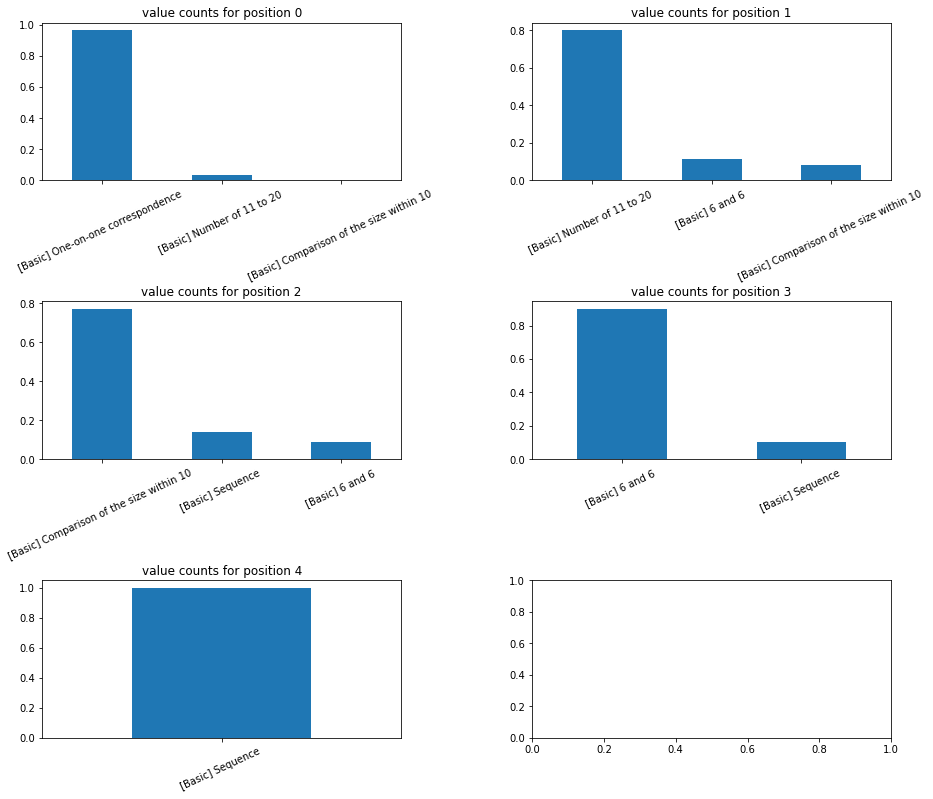

In [271]:
# for each position, count the number of times that a given exercise appears

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 13))
fig.tight_layout(pad=10)

for i, col in enumerate(expanded.columns):
    target_axes = axes[i // 2, i % 2]
    
    expanded[col].value_counts(normalize=True).plot(kind='bar', ax=target_axes, title=f'value counts for position {i}',
                                                    rot=25)

Looks like there is a dominant sequence in which students encounter exercises. However, this is not 'fixed'. 